# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


# Reading the Dataset

In [2]:
data = pd.read_csv('/kaggle/input/pizza-price-prediction/pizza_v2.csv')

In [3]:
data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [4]:
data.isnull().mean()

company            0.0
price_rupiah       0.0
diameter           0.0
topping            0.0
variant            0.0
size               0.0
extra_sauce        0.0
extra_cheese       0.0
extra_mushrooms    0.0
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [6]:
data.nunique()

company             5
price_rupiah       43
diameter           12
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

**company** - categorical variable   
**price_rupiah** - continuous variable   
**diameter** - categorical variable    
**topping** - categorical variable   
**variant** - categorical variable    
**size** - categorical variable   
**extra_sauce** - binary variable    
**extra_cheese** - binary variable   
**extra_mushrooms** - binary variable  

# Data preparation and analysis

### price_rupiah

**price_rupiah shows the price for pizza in rupees, we remove the currency designation and leave only the price**

In [7]:
data['price_rupiah'].unique()

array(['Rp235,000', 'Rp198,000', 'Rp120,000', 'Rp155,000', 'Rp248,000',
       'Rp140,000', 'Rp110,000', 'Rp70,000', 'Rp90,000', 'Rp230,000',
       'Rp188,000', 'Rp114,000', 'Rp149,000', 'Rp23,500', 'Rp46,000',
       'Rp72,000', 'Rp49,000', 'Rp83,000', 'Rp96,000', 'Rp31,000',
       'Rp69,000', 'Rp93,000', 'Rp75,000', 'Rp115,000', 'Rp123,000',
       'Rp33,000', 'Rp76,000', 'Rp119,000', 'Rp126,500', 'Rp39,000',
       'Rp99,000', 'Rp44,000', 'Rp78,000', 'Rp105,000', 'Rp35,000',
       'Rp60,000', 'Rp98,000', 'Rp28,000', 'Rp51,000', 'Rp84,000',
       'Rp32,000', 'Rp54,000', 'Rp92,000'], dtype=object)

In [8]:
data['price_rupiah'] = data.price_rupiah.str.extract(r'(\d+[.\d]*)').astype(int)

In [9]:
data['price_rupiah'].unique()

array([235, 198, 120, 155, 248, 140, 110,  70,  90, 230, 188, 114, 149,
        23,  46,  72,  49,  83,  96,  31,  69,  93,  75, 115, 123,  33,
        76, 119, 126,  39,  99,  44,  78, 105,  35,  60,  98,  28,  51,
        84,  32,  54,  92])

### diameter

**diameter - the diameter of the pizza in inches, similarly with the price - we make it a numerical sign**

In [10]:
data['diameter'].unique()

array(['22 inch', '20 inch', '16 inch', '14 inch', '18 inch', '18.5 inch',
       '8 inch', '12 inch', '16.5 inch', '8.5 inch', '17 inch',
       '14 inch\n'], dtype=object)

In [11]:
data['diameter'] = data.diameter.str.extract(r'(\d+[.\d]*)').astype(float)

In [12]:
data['diameter'].unique()

array([22. , 20. , 16. , 14. , 18. , 18.5,  8. , 12. , 16.5,  8.5, 17. ])

### extra_sauce, extra_mushrooms, extra_sauce

**We change these variables yes|no >>>>  1 | 0**

In [13]:
data.extra_mushrooms.unique()

array(['no', 'yes'], dtype=object)

In [14]:
cat = ['extra_sauce', 'extra_cheese', 'extra_mushrooms']
labelencoder = LabelEncoder()
for i in cat:
    data[i] = labelencoder.fit_transform(data[i])

In [15]:
data.extra_mushrooms.unique()

array([0, 1])

### topping / variant

**topping - pizza filler**  
**variant - pizza name on the menu**

In [16]:
for i in data.company.unique():
    print('company', i, list(data[data['company'] == i]['topping'].unique()))

company A ['chicken', 'papperoni', 'mushrooms', 'smoked_beef', 'mozzarella', 'black_papper']
company B ['mozzarella', 'chicken', 'smoked_beef', 'mushrooms']
company C ['tuna', 'meat', 'sausage', 'mushrooms', 'onion', 'mozzarella', 'vegetables', 'beef']
company D ['mozzarella', 'smoked_beef', 'chicken', 'mushrooms']
company E ['mozzarella', 'chicken', 'smoked_beef', 'mushrooms', 'tuna', 'meat']


**Unique toppings by company**

In [17]:
for i in data.variant.unique():
    print('variant', i, data[data['variant'] == i]['topping'].unique(), end='\n\n')

variant double_signature ['chicken' 'papperoni' 'mushrooms' 'smoked_beef' 'mozzarella']

variant american_favorite ['black_papper' 'smoked_beef' 'papperoni' 'mushrooms']

variant super_supreme ['mozzarella' 'black_papper' 'smoked_beef']

variant meat_lovers ['mozzarella' 'smoked_beef' 'chicken' 'mushrooms']

variant double_mix ['chicken' 'mushrooms' 'smoked_beef']

variant classic ['mozzarella' 'chicken' 'smoked_beef' 'mushrooms']

variant crunchy ['mozzarella' 'mushrooms' 'chicken' 'smoked_beef']

variant new_york ['chicken' 'mozzarella' 'mushrooms']

variant double_decker ['chicken' 'smoked_beef' 'mushrooms']

variant spicy_tuna ['tuna']

variant BBQ_meat_fiesta ['meat']

variant BBQ_sausage ['sausage']

variant extravaganza ['mushrooms' 'onion' 'mozzarella']

variant meat_eater ['meat']

variant gournet_greek ['vegetables']

variant italian_veggie ['vegetables']

variant thai_veggie ['vegetables']

variant american_classic ['beef']

variant neptune_tuna ['tuna']

variant spicy tuna 

In [18]:
data['variant'].replace('spicy_tuna', 'spicy tuna', inplace=True)

**Pizza name and topping options**

In [19]:
pd.DataFrame(data[data['company'] == 'C'].groupby(['variant', 'topping']).size())

0
variant          topping      
BBQ_meat_fiesta  meat        3
BBQ_sausage      sausage     3
american_classic beef        3
extravaganza     mozzarella  1
                 mushrooms   1
                 onion       1
gournet_greek    vegetables  3
italian_veggie   vegetables  3
meat_eater       meat        3
neptune_tuna     tuna        3
spicy tuna       tuna        3
thai_veggie      vegetables  3

In [20]:
pd.DataFrame(data[data['company'] == 'C'].groupby(['topping', 'variant'])[['price_rupiah']].mean())

price_rupiah
topping    variant                       
beef       american_classic     64.333333
meat       BBQ_meat_fiesta      75.666667
           meat_eater           64.333333
mozzarella extravaganza         98.000000
mushrooms  extravaganza         35.000000
onion      extravaganza         60.000000
sausage    BBQ_sausage          70.000000
tuna       neptune_tuna         59.333333
           spicy tuna           70.000000
vegetables gournet_greek        75.666667
           italian_veggie       54.333333
           thai_veggie          70.000000

In [21]:
data.drop('topping', axis=1, inplace=True)

**Some toppings and types of pizzas are highly correlated, for example, tuna and neptune_tuna, spice_tuna, or vegetables and italian_veggie, thai_veggie. In order not to 'feed' 129 pizzas - 32 columns (20 variant and 12 topping using the get_dummies method), let's remove one feature. I suggest leaving variant, since there is more variability in this feature, hence more opportunities for better training of the model.**

In [22]:
data.head()

,company,price_rupiah,diameter,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235,22.0,double_signature,jumbo,1,1,0
1,A,198,20.0,double_signature,jumbo,1,1,0
2,A,120,16.0,double_signature,reguler,1,1,1
3,A,155,14.0,double_signature,reguler,1,0,1
4,A,248,18.0,double_signature,jumbo,1,0,1


### size

**size - the size of the pizza, which correlates with the diameter. I don't quite understand why it is needed, since there is a detailed variable diameter, which has 12 exact values, when the variable size has 6 values. The values of small, reguler, medium, large, XL, jumbo are approximate, they are different for each company, for example:**
**<li>company A - reguler, jumbo**
**<li>company B - small, medium, large, XL**  


In [23]:
data['size'].unique()

array(['jumbo', 'reguler', 'small', 'medium', 'large', 'XL'], dtype=object)

In [24]:
for i in data.company.unique():
    print('company',i, list(data[data['company'] == i]['size'].unique()))

company A ['jumbo', 'reguler']
company B ['small', 'medium', 'large', 'XL']
company C ['small', 'medium', 'large']
company D ['jumbo', 'reguler', 'small', 'medium', 'large', 'XL']
company E ['XL', 'small', 'medium', 'large']


**List of unique size variables in each company**

In [25]:
data[(data['company'] == 'A') & (data['size'] == 'reguler')]['diameter'].unique()

array([16. , 14. ,  8. , 12. , 16.5])

**The spread of the diameter value with size == reguler is from 8 to 16.5**

In [26]:
data[(data['company'] == 'A') & (data['size'] == 'jumbo')]['diameter'].unique()

array([22. , 20. , 18. , 18.5, 16. ])

**The spread of the diameter value with size == reguler is from 16 to 22**

In [27]:
data.drop('size', axis=1, inplace=True)

**In both cases, diameter == 16 in both jumbo and reguler, even within the same company A. Therefore, we will delete the size variable so that there is no unnecessary noise in the data.**

In [28]:
data.head()

,company,price_rupiah,diameter,variant,extra_sauce,extra_cheese,extra_mushrooms
0,A,235,22.0,double_signature,1,1,0
1,A,198,20.0,double_signature,1,1,0
2,A,120,16.0,double_signature,1,1,1
3,A,155,14.0,double_signature,1,0,1
4,A,248,18.0,double_signature,1,0,1


### company

**company - 5 pizza companies** 

In [29]:
data.company.value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

**How many pizzas are in the table from each company**

<AxesSubplot:xlabel='company', ylabel='price_rupiah'>

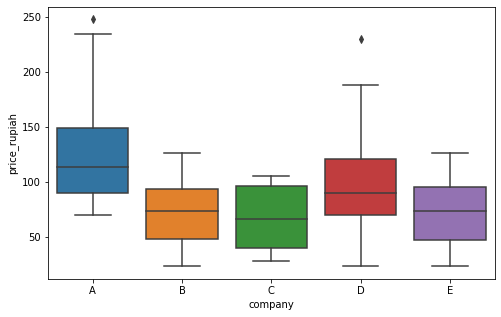

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='company', y='price_rupiah', data=data)

**Let's make a boxplot on the target variable price_rupiah and company, it is clearly visible that the prices are higher in A and D. The average price in company A is above the 75% quantile for 3 out of 4 companies - B, C, E.**

**When preparing the project, I divided the dataset by companies in order to train separately, but only company A and C had a relationship. The data is artificial so much that it turns out to build a model only if we consider all the companies together, in one dataset.**

In [31]:
data = pd.get_dummies(data)

**The values of the company and variant attributes are categorical, so we can't just take and replace them with numbers. Let's split all the values into columns using get_dummies. In this form, it is automatically applied to all non-numeric features (columns).**

In [32]:
data.head()

,price_rupiah,diameter,extra_sauce,extra_cheese,extra_mushrooms,company_A,company_B,company_C,company_D,company_E,...,variant_extravaganza,variant_gournet_greek,variant_italian_veggie,variant_meat_eater,variant_meat_lovers,variant_neptune_tuna,variant_new_york,variant_spicy tuna,variant_super_supreme,variant_thai_veggie
0,235,22.0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,198,20.0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,120,16.0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,155,14.0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,248,18.0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**<li>129 elements and 29 features**  
**<li>We have removed the size and topping signs**  
**<li>We applied labelcoder to the extra_safe extra_cheese, extra_mushrooms attributes because they are binary**  
**<li>For the price_rupiah and diameter signs, we left only the numbers using .str.extract**  
**<li>We applied get_dummies to the company and variant attributes, because these are categorical attributes and they cannot be numbered within a single attribute.**

# Training the model

**To begin with, let's build a correlation matrix to see how the features interact with the target feature - price_rupiah**

In [33]:
data.corr()['price_rupiah'].abs().sort_values(ascending=False)

price_rupiah                 1.000000
diameter                     0.827205
variant_double_mix           0.513281
company_A                    0.487713
variant_double_signature     0.469158
variant_classic              0.380626
company_C                    0.251273
company_E                    0.164350
variant_crunchy              0.162258
company_B                    0.144527
variant_double_decker        0.132404
variant_italian_veggie       0.113620
company_D                    0.107883
variant_neptune_tuna         0.096299
variant_spicy tuna           0.084948
variant_meat_lovers          0.083747
extra_sauce                  0.083477
variant_new_york             0.082446
variant_meat_eater           0.078978
variant_american_classic     0.078978
variant_extravaganza         0.078978
variant_BBQ_meat_fiesta      0.078135
variant_thai_veggie          0.059348
variant_BBQ_sausage          0.059348
variant_american_favorite    0.058012
variant_super_supreme        0.058012
variant_gour

**Let's take the module and sort it in descending order to see which variables correlate least with the target variable. A large negative correlation is also a correlation.**

In [34]:
pd.DataFrame(data.corr()['price_rupiah'].abs().sort_values(ascending=False)).T.columns

Index(['price_rupiah', 'diameter', 'variant_double_mix', 'company_A',
       'variant_double_signature', 'variant_classic', 'company_C', 'company_E',
       'variant_crunchy', 'company_B', 'variant_double_decker',
       'variant_italian_veggie', 'company_D', 'variant_neptune_tuna',
       'variant_spicy tuna', 'variant_meat_lovers', 'extra_sauce',
       'variant_new_york', 'variant_meat_eater', 'variant_american_classic',
       'variant_extravaganza', 'variant_BBQ_meat_fiesta',
       'variant_thai_veggie', 'variant_BBQ_sausage',
       'variant_american_favorite', 'variant_super_supreme',
       'variant_gournet_greek', 'extra_mushrooms', 'extra_cheese'],
      dtype='object')

**Transpose the dataframe so that our signs become columns and output a list of them. This is so that it is convenient to copy and delete columns before training. But we will leave everything.**

In [35]:
X = data.drop(['price_rupiah'], axis=1)
y = data.price_rupiah
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           price_rupiah   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     35.76
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           4.39e-40
Time:                        19:51:18   Log-Likelihood:                -523.53
No. Observations:                 129   AIC:                             1101.
Df Residuals:                     102   BIC:                             1178.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
diameter              

**Regression analysis using sm.OLD.**  
  
**<li> R-squared: 0.901 - shows how much our model explains the dependent variable - price_rupiah.**  
      
**<li> Adj. R-squared: 0.876 - adjusted R-squared. In simple words, this is the same indicator, but with a penalty for a large number of features in our model.**  
      
**<li> AIC and BIC are the Akaic criterion and the Schwartz criterion. Our model is penalized for a large amount of balances and a large number of regressors (signs). The lower the values of the criteria, the better.**  
      
**<li> The 'coef' attribute shows the coefficient of change of the price_rupiah variable. For example, increasing diameter by 1 would result in an increase in price_rupiah by 8.9101.**  
      
**<li> t and P>|t| shows the significance of the attribute for predicting the target variable price_rupiah. The more the first criterion is different from 0, the better for our model, the more the second criterion tends to 1, the worse for our model.**

In [36]:
def model_training(X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('R', Ridge()))
    models.append(('L', Lasso()))
    models.append(('BR', BayesianRidge(n_iter=1000)))
    models.append(('KNR', KNeighborsRegressor()))
    models.append(('DTR', DecisionTreeRegressor()))
    models.append(('SVR', SVR()))
    models.append(('ABR', AdaBoostRegressor(n_estimators=100)))
    models.append(('BR', BaggingRegressor(n_estimators=100)))
    models.append(('ETR', ExtraTreesRegressor(n_estimators=100)))
    models.append(('GBR', GradientBoostingRegressor(n_estimators=100)))
    models.append(('RFR', RandomForestRegressor(n_estimators=100)))
    scores = []
    names = []
    results = []
    predictions = []
    msg_row = []
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
        names.append(name)
        results.append(cv_results)
        m_fit = model.fit(X_train, Y_train)
        m_predict = model.predict(X_test)
        predictions.append(m_predict)
        m_score = r2_score(Y_test, m_predict)
        scores.append(m_score)
        msg = "%s: train = %.3f (%.3f) / test = %.3f" % (name, cv_results.mean(), cv_results.std(), m_score)
        msg_row.append(msg)
        print(msg)

In [37]:
model_training(X, y)

LR: train = 0.779 (0.080) / test = 0.869
R: train = 0.796 (0.094) / test = 0.854
L: train = 0.758 (0.133) / test = 0.777
BR: train = 0.797 (0.099) / test = 0.846
KNR: train = 0.742 (0.161) / test = 0.800
DTR: train = 0.745 (0.102) / test = 0.895
SVR: train = 0.066 (0.110) / test = 0.107
ABR: train = 0.808 (0.064) / test = 0.851
BR: train = 0.821 (0.051) / test = 0.876
ETR: train = 0.774 (0.044) / test = 0.853
GBR: train = 0.835 (0.059) / test = 0.941
RFR: train = 0.812 (0.056) / test = 0.878


**Best result: GradientBoostingRegressor: R2 score - 0.94**